<a href="https://colab.research.google.com/github/Screeeech/fall-fest-2022/blob/main/Quantum_Bit_Commitment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit numpy

In [ ]:
import numpy as np
import random
from qiskit import QuantumCircuit, transpile, Aer
from qiskit.providers.fake_provider import FakeQasmSimulator
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi

# Bit Commitment Schemes
## Background


A Real World example of this can be seen in the game show Jeopardy with the Final Jeopardy:

*   Contestants are all asked a question, and asked to write their answer on an envelope and seal it.
*   There is no way for the contestants to change their answers sealed in the envelopes after they answer, indicating Bindingness
*   There is no way for the contestants to know each others answers, indicating Hiddenness

In this specific case each contestant is acting as a Sender and Receiver for the other contestants, but at its core a commitment scheme involves 2 mistrustful parties and requires it to be Binding and Hidden to be effective.

Commitment schemes have important applications in many cryptographic protocols, such as zero knowledge proofs and secure computation.

Commitment schemes classically can only be perfectly Binding or perfectly Hidden. However with the creation of Quantum Key Distribution and it being unconditionally secure, the possibility for a perfectly Binding and perfectly Hidden commitment scheme utilizing Quantum mechanics was theorized.

However, only 3 years after the theoretical birth of an unconditional QBC (Quantum Bit commitment) the Mayers-Lo-Chau no-go Theorem was developed, deeming the impossibility of an unconditionally secure QBC protocol based on the core principles of QBC. This fact that a perfect QBC is impossible was widely accepted and it has even been considered through the CBH to be a fundamental building block of nature.



## Bypassing the MLC no-go Theorem
Based on a Paper published in 2018 by Guang Ping He, there is new theoretical backing for the creation of an unconditionally secure QBC. This is because of an assumption made during the proof, that the density matrices of the two possible states must be asymptomaically equal. This possibility was only considered in finite-space, but Guang theorizes that in an infinite dimensional system, Alice is unable to cheat because of the Uncertainty Principle imposed on her measurement device, effectively bypassing the MLC theorem

Below: create a basic quantum bit commitment scheme

In [ ]:
def alice_commit(commit, bitstr, circuit):
  firstq = bitstr.find("1")
  if commit != 0:
    circuit.x(firstq)
  circuit.h(firstq)
  
  for i in range(firstq+1, len(bitstr)):
    if bitstr[i] == "1":
      circuit.cnot(firstq, i)


def bob_reversal(commit, bitstr, circuit):
  print(bitstr)
  firstq = len(bitstr) - bitstr.find("1") - 1
  if firstq == -1:
    return

  bitstr = bitstr[::-1]
  lastq = bitstr.find("1")
  print(firstq, lastq)
  
  for i in range(lastq, firstq):
    if bitstr[i] == "1":
      circuit.cnot(len(bitstr) - firstq - 1, len(bitstr) - i - 1)

  circuit.h(len(bitstr) - firstq - 1)
  if commit != 0:
    circuit.x(len(bitstr) - firstq - 1)

In [ ]:
def randBitString(len):
  key1 = ""
  for i in range(len):
         
        # randint function to generate
        # 0, 1 randomly and converting
        # the result into str
        temp = str(random.randint(0, 1))
 
        # Concatenation the random 0, 1
        # to the final result
        key1 += temp
         
  return(key1)

In [220]:
NUM_QUBITS = 20
b = 1

qctest2 = QuantumCircuit(NUM_QUBITS)
seed = randBitString(NUM_QUBITS)
print(seed)
alice_commit(b,seed,qctest2)
qctest2.draw()

11111111000010100101


┌───┐┌───┐                                                       
 q_0: ┤ X ├┤ H ├──■────■────■────■────■────■────■────■────■────■────■──
      └───┘└───┘┌─┴─┐  │    │    │    │    │    │    │    │    │    │  
 q_1: ──────────┤ X ├──┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──
                └───┘┌─┴─┐  │    │    │    │    │    │    │    │    │  
 q_2: ───────────────┤ X ├──┼────┼────┼────┼────┼────┼────┼────┼────┼──
                     └───┘┌─┴─┐  │    │    │    │    │    │    │    │  
 q_3: ────────────────────┤ X ├──┼────┼────┼────┼────┼────┼────┼────┼──
                          └───┘┌─┴─┐  │    │    │    │    │    │    │  
 q_4: ─────────────────────────┤ X ├──┼────┼────┼────┼────┼────┼────┼──
                               └───┘┌─┴─┐  │    │    │    │    │    │  
 q_5: ──────────────────────────────┤ X ├──┼────┼────┼────┼────┼────┼──
                                    └───┘┌─┴─┐  │    │    │    │    │  
 q_6: ───────────────────────────────────┤ X ├──┼────┼────┼────┼────┼──
                                         └───┘┌─┴─┐  │    │    │    │  
 q_7: ────────────────────────────────────────┤ X ├──┼────┼────┼────┼──
                                              └───┘  │    │    │    │  
 q_8: ───────────────────────────────────────────────┼────┼────┼────┼──
                                                     │    │    │    │  
 q_9: ───────────────────────────────────────────────┼────┼────┼────┼──
                                                     │    │    │    │  
q_10: ───────────────────────────────────────────────┼────┼────┼────┼──
                                                     │    │    │    │  
q_11: ───────────────────────────────────────────────┼────┼────┼────┼──
                                                   ┌─┴─┐  │    │    │  
q_12: ─────────────────────────────────────────────┤ X ├──┼────┼────┼──
                                                   └───┘  │    │    │  
q_13: ────────────────────────────────────────────────────┼────┼────┼──
                                                        ┌─┴─┐  │    │  
q_14: ──────────────────────────────────────────────────┤ X ├──┼────┼──
                                                        └───┘  │    │  
q_15: ─────────────────────────────────────────────────────────┼────┼──
                                                               │    │  
q_16: ─────────────────────────────────────────────────────────┼────┼──
                                                             ┌─┴─┐  │  
q_17: ───────────────────────────────────────────────────────┤ X ├──┼──
                                                             └───┘  │  
q_18: ──────────────────────────────────────────────────────────────┼──
                                                                  ┌─┴─┐
q_19: ────────────────────────────────────────────────────────────┤ X ├
                                                                  └───┘

In [221]:
bob_reversal(0,seed,qctest2)
qctest2.draw()

11111111000010100101
19 0


┌───┐┌───┐                                                            »
 q_0: ┤ X ├┤ H ├──■────■────■────■────■────■────■────■────■────■────■────■──»
      └───┘└───┘┌─┴─┐  │    │    │    │    │    │    │    │    │    │    │  »
 q_1: ──────────┤ X ├──┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
                └───┘┌─┴─┐  │    │    │    │    │    │    │    │    │    │  »
 q_2: ───────────────┤ X ├──┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
                     └───┘┌─┴─┐  │    │    │    │    │    │    │    │    │  »
 q_3: ────────────────────┤ X ├──┼────┼────┼────┼────┼────┼────┼────┼────┼──»
                          └───┘┌─┴─┐  │    │    │    │    │    │    │    │  »
 q_4: ─────────────────────────┤ X ├──┼────┼────┼────┼────┼────┼────┼────┼──»
                               └───┘┌─┴─┐  │    │    │    │    │    │    │  »
 q_5: ──────────────────────────────┤ X ├──┼────┼────┼────┼────┼────┼────┼──»
                                    └───┘┌─┴─┐  │    │    │    │    │    │  »
 q_6: ───────────────────────────────────┤ X ├──┼────┼────┼────┼────┼────┼──»
                                         └───┘┌─┴─┐  │    │    │    │    │  »
 q_7: ────────────────────────────────────────┤ X ├──┼────┼────┼────┼────┼──»
                                              └───┘  │    │    │    │    │  »
 q_8: ───────────────────────────────────────────────┼────┼────┼────┼────┼──»
                                                     │    │    │    │    │  »
 q_9: ───────────────────────────────────────────────┼────┼────┼────┼────┼──»
                                                     │    │    │    │    │  »
q_10: ───────────────────────────────────────────────┼────┼────┼────┼────┼──»
                                                     │    │    │    │    │  »
q_11: ───────────────────────────────────────────────┼────┼────┼────┼────┼──»
                                                   ┌─┴─┐  │    │    │    │  »
q_12: ─────────────────────────────────────────────┤ X ├──┼────┼────┼────┼──»
                                                   └───┘  │    │    │    │  »
q_13: ────────────────────────────────────────────────────┼────┼────┼────┼──»
                                                        ┌─┴─┐  │    │    │  »
q_14: ──────────────────────────────────────────────────┤ X ├──┼────┼────┼──»
                                                        └───┘  │    │    │  »
q_15: ─────────────────────────────────────────────────────────┼────┼────┼──»
                                                               │    │    │  »
q_16: ─────────────────────────────────────────────────────────┼────┼────┼──»
                                                             ┌─┴─┐  │    │  »
q_17: ───────────────────────────────────────────────────────┤ X ├──┼────┼──»
                                                             └───┘  │    │  »
q_18: ──────────────────────────────────────────────────────────────┼────┼──»
                                                                  ┌─┴─┐┌─┴─┐»
q_19: ────────────────────────────────────────────────────────────┤ X ├┤ X ├»
                                                                  └───┘└───┘»
«                                                        ┌───┐
« q_0: ──■────■────■────■────■────■────■────■────■────■──┤ H ├
«        │    │    │    │    │    │    │    │    │  ┌─┴─┐└───┘
« q_1: ──┼────┼────┼────┼────┼────┼────┼────┼────┼──┤ X ├─────
«        │    │    │    │    │    │    │    │  ┌─┴─┐└───┘     
« q_2: ──┼────┼────┼────┼────┼────┼────┼────┼──┤ X ├──────────
«        │    │    │    │    │    │    │  ┌─┴─┐└───┘          
« q_3: ──┼────┼────┼────┼────┼────┼────┼──┤ X ├───────────────
«        │    │    │    │    │    │  ┌─┴─┐└───┘               
« q_4: ──┼────┼────┼────┼────┼────┼──┤ X ├────────────────────
«        │    │    │    │    │  ┌─┴─┐└───┘                    
« q_5: ──┼────┼────┼────┼────┼──┤ X ├─────────────────────────
«        │    │    │    │  ┌─┴─┐└───┘               

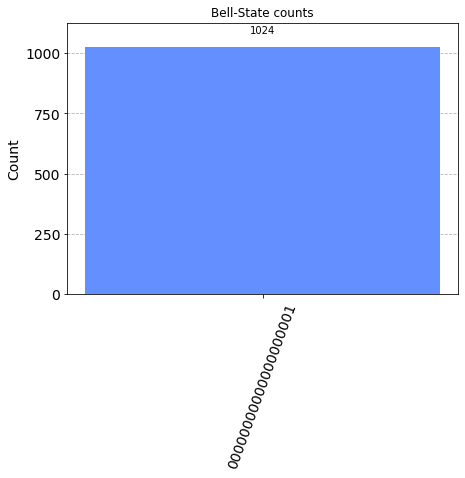

In [222]:
qctest2.measure_all()

simulator = Aer.get_backend('aer_simulator')
circ = transpile(qctest2,simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)

plot_histogram(counts, title='Bell-State counts')

# Applications

There is a clear application for quantum bit commitment schemes in verification processes that require zero-knowledge based decisions. A concrete example is a an online casino where a gambler places a bet on a roulette wheel and the dealer reveals if the ball landed on red or black; if the gambler was able to change his decision after the measurement of the wheel was made or if the dealer was able to lie about the wheel's outcome so as to not lose money, the game would be completely rigged. To ensure that it isn't we need to come up with an uncrackable commitment scheme so that both parties know that the other side did not change their minds after information had been revealed.


In this case, the gambler would be Alice and the dealer would be Bob, and doing the protocol s number of times will give both Alice and Bob the confidence that they haven't cheated each other.